In [24]:
import lasagne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import (division, print_function)
%matplotlib inline
import os
import sys
print(sys.version)

2.7.10 |Anaconda 2.5.0 (x86_64)| (default, Oct 19 2015, 18:31:17) 
[GCC 4.2.1 (Apple Inc. build 5577)]


/Users/florentpajot/Code/Python-SQLI/sqli/sqli/Data/


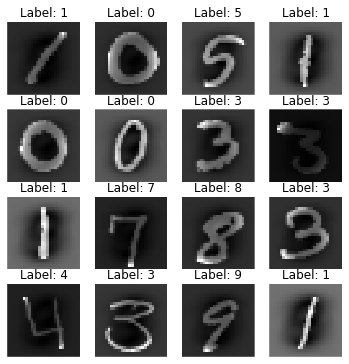

In [29]:
base_path = os.getcwd()
data_folder = os.path.join(base_path, 'Data/')
print(data_folder)

# reading files
train_file = os.path.join(data_folder, 'train.csv')
train_set = np.recfromcsv(train_file, delimiter=',', skip_header=0, dtype=int, filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

test_file = os.path.join(data_folder, 'test.csv')
test_set = np.recfromcsv(test_file, delimiter=',', skip_header=0, dtype=int, filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

#converting files to a list of np arrays
train_set = train_set.tolist()
test_set = test_set.tolist()

train_set = [np.array(record, dtype=np.int32) for record in train_set]
test_set = [np.array(record, dtype=np.int32) for record in test_set]

#divide train set into data and labels
m = len(train_set)
train_set = np.array(train_set).reshape(m, -1)
labels = [record[0] for record in train_set]
train_set = [record[1:] for record in train_set]

# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set).astype(np.float32)
test_set = scaler.transform(test_set).astype(np.float32)

# visualizing one image per class
figs, axes = plt.subplots(4,4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(train_set[i + 4*j].reshape(28,28), cmap='gray', interpolation='none')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title("Label: {}".format(labels[i + 4 * j]))
        axes[i, j].axis('off')
#plt.axis('off')
#plt.imshow(train_set[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

# cross validation with 1 fold
from sklearn.cross_validation import StratifiedShuffleSplit
splits = StratifiedShuffleSplit(labels, n_iter=1, test_size=0.3, random_state=1)

for t_i, v_i in splits:
    # Compute the train set
    train = np.array([train_set[i] for i in t_i])
    t_labels = np.array([labels[i] for i in t_i])
    # Compute the validation set
    val = np.array([train_set[i] for i in v_i])
    v_labels = np.array([labels[i] for i in v_i])



In [47]:
whos

Variable                 Type                      Data/Info
------------------------------------------------------------
Activation               type                      <class 'keras.layers.core.Activation'>
Dense                    type                      <class 'keras.layers.core.Dense'>
Dropout                  type                      <class 'keras.layers.core.Dropout'>
Input                    function                  <function Input at 0x10c45bcf8>
Model                    type                      <class 'keras.engine.training.Model'>
SGD                      type                      <class 'keras.optimizers.SGD'>
Sequential               type                      <class 'keras.models.Sequential'>
StandardScaler           type                      <class 'sklearn.preproces<...>ing.data.StandardScaler'>
StratifiedShuffleSplit   ABCMeta                   <class 'sklearn.cross_val<...>.StratifiedShuffleSplit'>
axes                     ndarray                   4x4: 16 elem

In [4]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

In [8]:
train = train.reshape(-1, 1, 28, 28)
val = val.reshape(-1, 1, 28, 28)

net1 = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer)],
        #layer parameters:
        input_shape=(None,1,28,28),
        hidden_num_units=200,
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=10,
        
        #opitmization method:
        update=nesterov_momentum,
        update_learning_rate=0.001,
        update_momentum=0.9,
        max_epochs=5,
        verbose=1)

In [ ]:
net1.fit(train, t_labels)

# Neural Network with 159010 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   1x28x28
  1  hidden  200
  2  output  10



In [ ]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 28, 28),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=10, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(15).fit(train,target) # train the CNN model for 15 epochs

In [45]:
#Sale thing using Keras (keras.io)
from keras.layers import Dense, Activation, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD

# Keras is based on a Sequential model (we pass a list of layers to the constructor)
kerasNet1 = Sequential([
        Dense(200, batch_input_shape=(None,784)), #None means batch of any size
        Activation('relu'), # C'est quoi ?
        Dense(10),
        Activation('softmax'),
    ])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Configuring the learning process
kerasNet1.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

train = train.reshape(-1, 784)

# Keras needs us to convert our labels to binary formats (but provides a super tool for it :))
from keras.utils.np_utils import to_categorical
t_binary_labels = to_categorical(t_labels)
v_binary_labels = to_categorical(v_labels)

# training the NN
kerasNet1.fit(train, t_binary_labels, nb_epoch=100, batch_size=100, validation_data=(val, v_binary_labels))

Train on 29400 samples, validate on 12600 samples
Epoch 1/100
29400/29400 [==============================] - 2s - loss: 0.9119 - acc: 0.7437 - val_loss: 0.4755 - val_acc: 0.8726
Epoch 2/100
29400/29400 [==============================] - 2s - loss: 0.3981 - acc: 0.8932 - val_loss: 0.3663 - val_acc: 0.8977
Epoch 3/100
29400/29400 [==============================] - 2s - loss: 0.3196 - acc: 0.9108 - val_loss: 0.3199 - val_acc: 0.9103
Epoch 4/100
29400/29400 [==============================] - 2s - loss: 0.2781 - acc: 0.9213 - val_loss: 0.2921 - val_acc: 0.9194
Epoch 5/100
29400/29400 [==============================] - 2s - loss: 0.2501 - acc: 0.9295 - val_loss: 0.2724 - val_acc: 0.9232
Epoch 6/100
29400/29400 [==============================] - 2s - loss: 0.2294 - acc: 0.9353 - val_loss: 0.2576 - val_acc: 0.9270
Epoch 7/100
29400/29400 [==============================] - 1s - loss: 0.2132 - acc: 0.9397 - val_loss: 0.2457 - val_acc: 0.9321
Epoch 8/100
29400/29400 [=============================

In [43]:
# Prediction sur validation
val = val.reshape(-1, 784)
prediction = kerasNet1.predict(val, r)

from sklearn.metrics import f1_score

v_binary_labels = to_categorical(v_labels)
for i in range(10):
    f1_score(v_binary_labels[:,i], prediction[:,i])



ValueError: Can't handle mix of binary and continuous

In [46]:
kerasNet1.history

AttributeError: 'Sequential' object has no attribute 'history'